# Yucatan Peninsula Hurricanes
### Week 4 - Discussion section

Date: 2024-10-24

In [23]:
# Import our libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# Load in out data 
df = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-hfr.71.23&entityid=ab0fe2bf4f3ad850371ccb9c69d78469", parse_dates = ['start.date', 'end.date'])

## Preliminary data exploration 

In [10]:
# View data frame 
df.head()

,code,start.date,end.date,number,name,ss,track,rf.max
0,Y1852,1852-10-07,1852-10-08,5,NaN,2,O,F1
1,Y1857,1857-09-28,1857-09-28,4,NaN,2,N,F1
2,Y1861,1861-08-17,1861-08-17,2,NaN,1,O,Nd
3,Y1864,1864-08-31,1864-08-31,3,NaN,1,S,F1
4,Y1865,1865-09-11,1865-09-11,4,NaN,2,O,F1


In [11]:
# View info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   code        105 non-null    object        
 1   start.date  105 non-null    datetime64[ns]
 2   end.date    105 non-null    datetime64[ns]
 3   number      105 non-null    int64         
 4   name        33 non-null     object        
 5   ss          105 non-null    int64         
 6   track       105 non-null    object        
 7   rf.max      105 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 6.7+ KB


In [7]:
# View unique values data 
df.nunique()

code          105
start.date    105
end.date      105
number         15
name           32
ss              5
track           5
rf.max          5
dtype: int64

## Brain storm 

- Change date (did that when reading in column)
- Duration column to find number of days of each hurricane 
- Column 'ss' is our categories, filter to 5
- count the number of category 5 hurricanes 

In [14]:
# Create duration column 
df['duration'] = df['end.date'] - df['start.date']

# Confirm that it worked 
df.head()

,code,start.date,end.date,number,name,ss,track,rf.max,duration
0,Y1852,1852-10-07,1852-10-08,5,NaN,2,O,F1,1 days
1,Y1857,1857-09-28,1857-09-28,4,NaN,2,N,F1,0 days
2,Y1861,1861-08-17,1861-08-17,2,NaN,1,O,Nd,0 days
3,Y1864,1864-08-31,1864-08-31,3,NaN,1,S,F1,0 days
4,Y1865,1865-09-11,1865-09-11,4,NaN,2,O,F1,0 days


In [17]:
# Filter 'ss' to 5 

df_5 = df[df['ss'] == 5]

# View new data frame
df_5.head()

,code,start.date,end.date,number,name,ss,track,rf.max,duration
76,Y1955b,1955-09-28,1955-09-28,10,Janet,5,N,F3,0 days
96,Y1980a,1980-08-07,1980-08-08,1,Allen,5,O,F3,1 days
98,Y1988,1988-09-14,1988-09-15,8,Gilbert,5,N,F3,1 days
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1,1 days


In [22]:
# Drop columns 
df_5[['name', 'ss', 'duration']]

,name,ss,duration
76,Janet,5,0 days
96,Allen,5,1 days
98,Gilbert,5,1 days
103,Mitch,5,1 days


<function matplotlib.pyplot.show(close=None, block=None)>

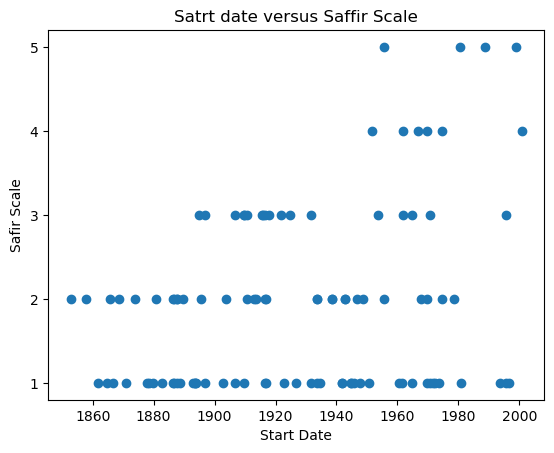

In [24]:
plt.figure()
plt.scatter(df['start.date'], df['ss'])

plt.title("Satrt date versus Saffir Scale")
plt.xlabel("Start Date")
plt.ylabel("Safir Scale")

plt.yticks([1, 2, 3, 4, 5])

plt.show